In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests 

In [47]:
#import and clean data
df_turnstyle = pd.read_csv('../turnstile_181117.csv', encoding='latin1')
df_turnstyle.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/10/18,3:00:00,REGULAR,6829784,2315945
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/10/18,7:00:00,REGULAR,6829801,2315955
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/10/18,11:00:00,REGULAR,6829893,2316026
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/10/18,15:00:00,REGULAR,6830105,2316085
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/10/18,19:00:00,REGULAR,6830448,2316157


In [48]:
#format date/time 
df_turnstyle["DATE"] = pd.to_datetime(df_turnstyle["DATE"])
df_turnstyle.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-11-10,3:00:00,REGULAR,6829784,2315945
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-11-10,7:00:00,REGULAR,6829801,2315955
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-11-10,11:00:00,REGULAR,6829893,2316026
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-11-10,15:00:00,REGULAR,6830105,2316085
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-11-10,19:00:00,REGULAR,6830448,2316157


In [49]:
#add weekday column
df_turnstyle["WEEKDAY"] = df_turnstyle["DATE"].dt.day_name()
df_turnstyle.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,WEEKDAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-11-10,3:00:00,REGULAR,6829784,2315945,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-11-10,7:00:00,REGULAR,6829801,2315955,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-11-10,11:00:00,REGULAR,6829893,2316026,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-11-10,15:00:00,REGULAR,6830105,2316085,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-11-10,19:00:00,REGULAR,6830448,2316157,Saturday


In [51]:
#remove saturday and sunday 
df_turnstyle = df_turnstyle.loc[(df_turnstyle["WEEKDAY"]!="Saturday") & df_turnstyle["WEEKDAY"]!=                               "Sunday", :]
df_turnstyle.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,WEEKDAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-11-10,3:00:00,REGULAR,6829784,2315945,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-11-10,7:00:00,REGULAR,6829801,2315955,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-11-10,11:00:00,REGULAR,6829893,2316026,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-11-10,15:00:00,REGULAR,6830105,2316085,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-11-10,19:00:00,REGULAR,6830448,2316157,Saturday


In [52]:
#keep only 8am 
df_turnstyle = df_turnstyle.loc[(df_turnstyle["TIME"]=="8:00:00"), : ]
df_turnstyle.head()
df_turnstyle.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'WEEKDAY'],
      dtype='object')

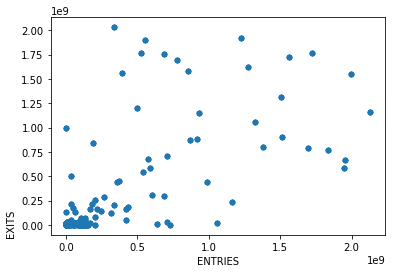

In [53]:
df_turnstyle.plot(kind='scatter', x='ENTRIES', y='EXITS                                                               ')
df.name.unique()plt.show()

In [58]:
df_turnstyle.STATION.unique()
df_turnstyle.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,WEEKDAY
4378,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-11-10,8:00:00,REGULAR,2001807,5046946,Saturday
4384,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-11-11,8:00:00,REGULAR,2002313,5048581,Sunday
4390,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-11-12,8:00:00,REGULAR,2002621,5049766,Monday
4396,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-11-13,8:00:00,REGULAR,2003864,5052561,Tuesday
4402,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-11-14,8:00:00,REGULAR,2005352,5055720,Wednesday
